In [383]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [384]:
X = np.array(pd.read_csv('opencl/output.csv', delimiter=';', header=None))
X = X.reshape(X.shape[0], X.shape[1] / 4, 4)
GRAVITY = -10.0

print X.shape
dt = 0.1#0.0001; # i.e. dtSampling
T = np.array(range(X.shape[0])) * dt;

(201, 2048, 4)


In [385]:
def integrate(X, dt):
    Y = X.copy()
    Y[:, 0] += Y[:, 2]*dt
    Y[:, 1] += Y[:, 3]*dt + GRAVITY*0.5*dt*dt
    #Y[:, 1] += -1.0
    Y[:, 3] += GRAVITY*dt
    return Y;
def get_kinetic_energy(X):
    return 0.5 * np.sum(X[:, 2] * X[:, 2] + X[:, 3] * X[:, 3])
def get_gravitational_potential_energy(X):
    return -GRAVITY * np.sum(X[:, 1])
def hamiltonian(X):
    return get_kinetic_energy(X) + get_gravitational_potential_energy(X)

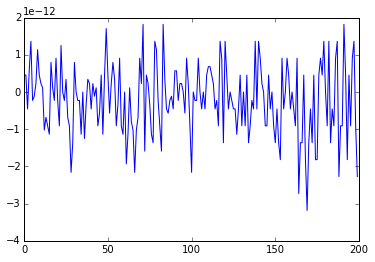

In [386]:
# Double check the Hamiltonian change resulting from the integration in python (this just to check the py implem is ok)
# --> It should be zero all the time
# Note: elastic wall collisions don't change the hamiltonian

steps = 1
t = range(len(T) - steps)
dH = map(lambda t: hamiltonian(integrate(X[t], dt * steps)) - hamiltonian(X[t]), t)
plt.plot(dH)

In [387]:
# This is how the hamiltonian change error should evolve with dt
# Note: this is inacurrate if the walls are on
# --> it should be independant of dt
t = 700
Y = X[t, :, :].copy()
x = range(1,10)
H0 = hamiltonian(Y)
dH = map(lambda x: hamiltonian(integrate(Y, np.power(10.0, -x))) - H0, x)
plt.plot(x, dH, 'x-')
for i in range(len(x)):
    print np.power(10.0, -x[i]), dH[i]

IndexError: index 700 is out of bounds for axis 0 with size 201

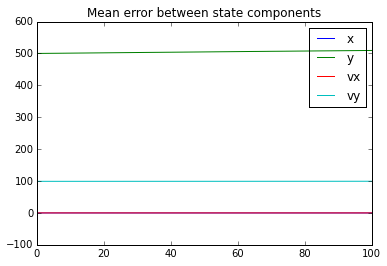

In [388]:
# Investigate the difference in integration between python and C
# --> it should be flat
# Note: this won't be accurate with wall collisions.
# the small deviations could be understood as truncations when writing Xt and Xt+1 to csv
steps = 100
t = range(len(T) - steps)
dX = map(lambda t: X[t + steps] - integrate(X[t], dt * steps), t)
plt.plot(np.mean(dX, axis=1))
plt.legend(['x', 'y', 'vx', 'vy'])
plt.title('Mean error between state components')

## Why is y increasing as t -> oo? Because the truncation error gets bigger as the particle falls lower

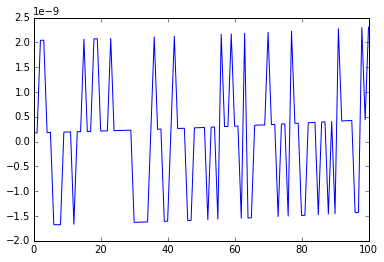

In [389]:
# Check the Hamiltonian we obtain after integration in python is the same as in C
# --> It should be zero all the time
# Note: elastic wall collisions don't change the hamiltonian

steps = 100
t = range(len(T) - steps)
dH = map(lambda t: hamiltonian(integrate(X[t], dt * steps)) - hamiltonian(X[t + steps]), t)
plt.plot(dH)

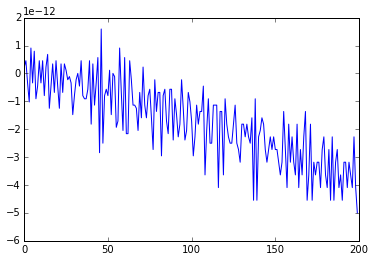

In [390]:
# Finally check that dH = 0
steps = 1
t = range(len(T) - steps)
dH = map(lambda t: hamiltonian(X[t + steps]) - hamiltonian(X[t]), t)
plt.plot(dH)

[ 0.16 -0.46  0.2  -2.7 ]
[ 0.1006   -0.099145  0.2       0.27    ]


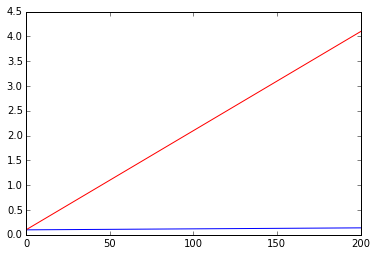

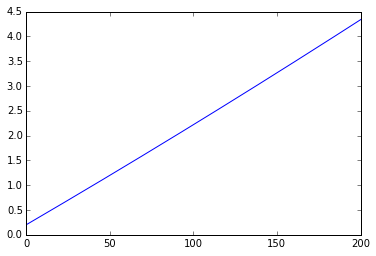